In [8]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 10


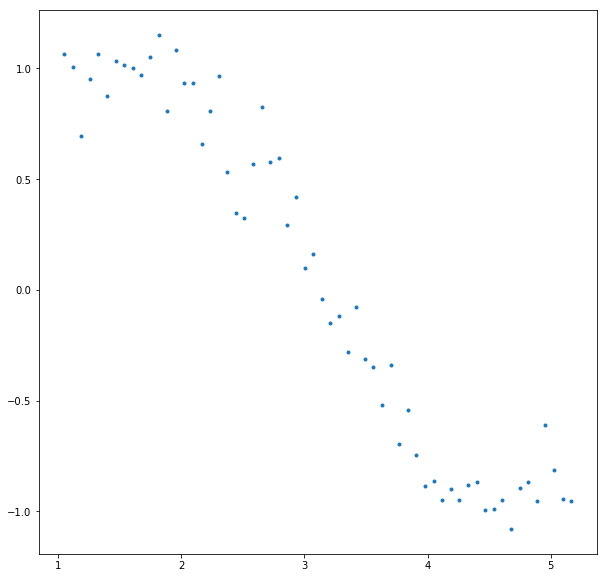

In [9]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns= ['x', 'y'])
plt.plot(data['x'], data['y'], '.')

In [11]:
for i in range(2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i
print (data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [13]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power >=2 :
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
     #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret


In [46]:
clf = linear_model.Lasso(alpha = 0.01)

In [49]:
clf.fit([[0,5],[1,6],[2,9]],[0,1,2])

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
print(clf.coef_)

[ 0.89601757  0.04453035]


In [51]:
clf.intercept_

-0.19288658409844528

In [28]:
[[0,0],[1,1],[2,2]]

[[0, 0], [1, 1], [2, 2]]

In [29]:
[0,1,2]

[0, 1, 2]

In [32]:
X =[[0,0],[1,1],[2,2]] 
Y = [0,1,2]

In [33]:
clf.fit(X,Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
clf.predict([[5,5]])

array([ 4.50985303])

In [37]:
print(X)

[[0, 0], [1, 1], [2, 2]]
